# Problem Statement
Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes. 

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. 
Even though it's incurable, it can be managed by treatment and medication.

Researchers at the Bio-Solutions lab want to get a better understanding of this disease among women and are planning to use machine learning models that will help them to identify patients who are at risk of diabetes. 

You as a data scientist at Bio-Solutions have to build a classification model using a dataset collected by the "National Institute of Diabetes and Digestive and Kidney Diseases" consisting of several attributes that would help to identify whether a person is at risk of diabetes or not.

# Objective:

To build a model to predict whether an individual is at risk of diabetes or not.

# Data Description:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
* Age: Age in years
* Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

%load_ext nb_black


# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

### Read the dataset

In [2]:
tourism_data_orig = pd.read_excel("tourism.xlsx")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
tourism_data = tourism_data_orig.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [4]:
tourism_data.sample(5, random_state=1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [5]:
tourism_data.shape

(4888, 20)

<IPython.core.display.Javascript object>

    * There are 4888 observations and 20 columns in the dataset

### Check the data types of the columns for the dataset.

In [6]:
tourism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

**Observations -**
* There are some object variables like TypeofContact, Occupation, Gender, ProductPitched,MaritalStatus & Designation
* Age has missing values that can be treated with mean / median.  I would go with median as a particular age might be more inclined towards tourism 
* 

In [7]:
category_cols = [
    "Designation",
    "OwnCar",
    "Passport",
    "CityTier",
    "MaritalStatus",
    "ProductPitched",
    "Gender",
    "Occupation",
    "TypeofContact",
]
tourism_data[category_cols] = tourism_data[category_cols].astype("category")
tourism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

<IPython.core.display.Javascript object>

* Duration of Pitch need to be analyzed
* Monthly Income - Mean for missing
* Age - Median for missing 
* 

### Summary of the dataset.

In [8]:
tourism_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.00,1.0,2.00,3.0


<IPython.core.display.Javascript object>

In [9]:
tourism_data.describe(include="category").T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


<IPython.core.display.Javascript object>

In [10]:
tourism_data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

<IPython.core.display.Javascript object>

#### Data Preprocessing

In [11]:
tourism_data.drop(["CustomerID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [12]:
for columnname in category_cols:
    print(f"Unique value of column {columnname}:")
    print("-" * 50)
    print(tourism_data[columnname].value_counts())
    print("+" * 50)


Unique value of column Designation:
--------------------------------------------------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
Unique value of column OwnCar:
--------------------------------------------------
1    3032
0    1856
Name: OwnCar, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
Unique value of column Passport:
--------------------------------------------------
0    3466
1    1422
Name: Passport, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
Unique value of column CityTier:
--------------------------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
Unique value of column MaritalStatus:
--------------------------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     

<IPython.core.display.Javascript object>

In [13]:
tourism_data["Gender"] = tourism_data["Gender"].apply(
    lambda x: "Female" if x == "Fe Male" else x
)
tourism_data.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

### Missing Value Treatment

In [14]:
tourism_data["TypeofContact"].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
tourism_data["TypeofContact"] = tourism_data["TypeofContact"].fillna("Self Enquiry")

<IPython.core.display.Javascript object>

In [16]:
tourism_data["PreferredPropertyStar"] = tourism_data.groupby(["Designation"])[
    "PreferredPropertyStar"
].apply(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [17]:
tourism_data.groupby(["Gender", "ProductPitched"])["NumberOfFollowups"].median()

Gender  ProductPitched
Female  Basic             4.0
        Deluxe            4.0
        King              4.0
        Standard          4.0
        Super Deluxe      4.0
Male    Basic             4.0
        Deluxe            4.0
        King              4.0
        Standard          4.0
        Super Deluxe      4.0
Name: NumberOfFollowups, dtype: float64

<IPython.core.display.Javascript object>

In [18]:
tourism_data["NumberOfFollowups"] = tourism_data.groupby(["Gender", "ProductPitched"])[
    "NumberOfFollowups"
].apply(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [19]:
tourism_data["NumberOfChildrenVisiting"] = tourism_data[
    "NumberOfChildrenVisiting"
].fillna(0)

<IPython.core.display.Javascript object>

In [20]:
tourism_data["NumberOfTrips"] = tourism_data.groupby(["MaritalStatus"])[
    "NumberOfTrips"
].apply(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [21]:
tourism_data.groupby(["Designation", "Gender", "MaritalStatus"])["Age"].median()

Designation     Gender  MaritalStatus
AVP             Female  Divorced         47.0
                        Married          48.0
                        Single           53.0
                        Unmarried        40.0
                Male    Divorced         49.5
                        Married          50.0
                        Single           48.0
                        Unmarried        39.0
Executive       Female  Divorced         34.0
                        Married          33.0
                        Single           30.0
                        Unmarried        33.0
                Male    Divorced         32.0
                        Married          32.0
                        Single           30.0
                        Unmarried        32.0
Manager         Female  Divorced         36.0
                        Married          38.0
                        Single           35.5
                        Unmarried        36.0
                Male    Divorced         3

<IPython.core.display.Javascript object>

In [22]:
tourism_data["Age"] = tourism_data.groupby(["Designation", "Gender", "MaritalStatus"])[
    "Age"
].apply(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [23]:
tourism_data.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].median()


Occupation      Designation     Gender
Free Lancer     AVP             Female        NaN
                                Male          NaN
                Executive       Female        NaN
                                Male      18929.0
                Manager         Female        NaN
                                Male          NaN
                Senior Manager  Female        NaN
                                Male          NaN
                VP              Female        NaN
                                Male          NaN
Large Business  AVP             Female    31872.0
                                Male      29959.0
                Executive       Female    20748.0
                                Male      20743.5
                Manager         Female    22198.5
                                Male      21997.0
                Senior Manager  Female    28266.0
                                Male      26838.5
                VP              Female    36583.0
           

<IPython.core.display.Javascript object>

In [24]:
tourism_data["MonthlyIncome"] = tourism_data.groupby(
    ["Occupation", "Designation", "Gender"]
)["MonthlyIncome"].apply(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [25]:
tourism_data.groupby(["ProductPitched", "NumberOfFollowups"], as_index=False)[
    "DurationOfPitch"
].median()

,ProductPitched,NumberOfFollowups,DurationOfPitch
0,Basic,1.0,14.0
1,Basic,2.0,15.0
2,Basic,3.0,13.0
3,Basic,4.0,13.0
4,Basic,5.0,12.0
5,Basic,6.0,15.5
6,Deluxe,1.0,11.5
7,Deluxe,2.0,13.0
8,Deluxe,3.0,14.0
9,Deluxe,4.0,14.0


<IPython.core.display.Javascript object>

In [26]:
tourism_data["DurationOfPitch"] = tourism_data.groupby(
    ["ProductPitched", "NumberOfFollowups"]
)["DurationOfPitch"].apply(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [27]:
tourism_data.isnull().sum().sort_values(ascending=False)

ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

In [28]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(10, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    f2.suptitle(
        "Data Distribution of column: " + feature, fontsize=18, fontweight="bold",
    )
    sns.boxplot(
        data[feature], ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        data[feature], kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        data[feature], kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

<IPython.core.display.Javascript object>

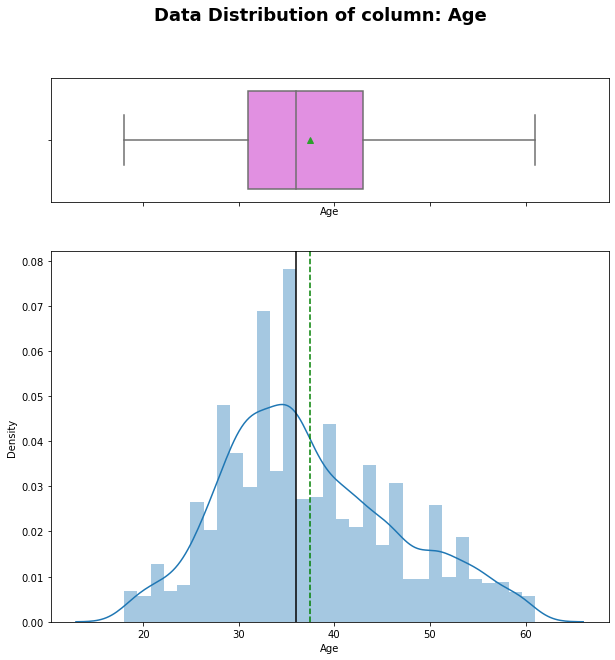

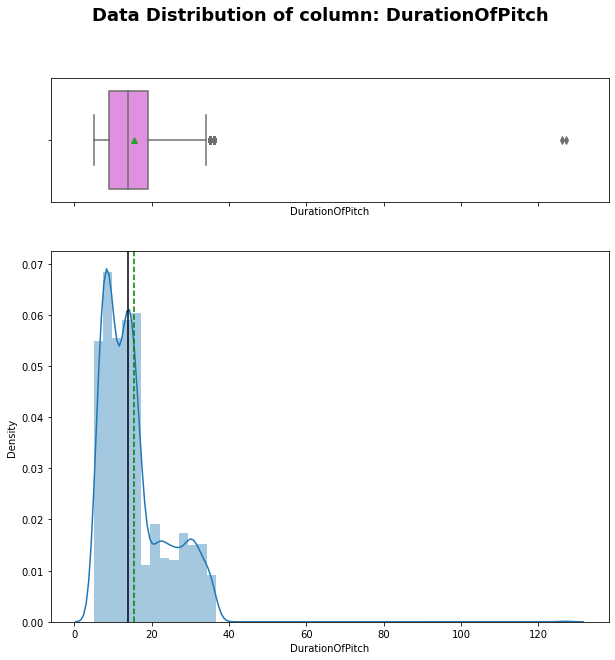

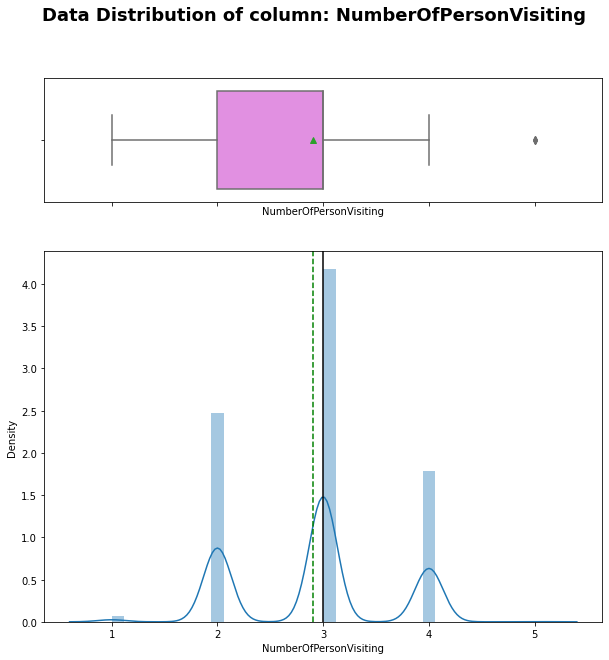

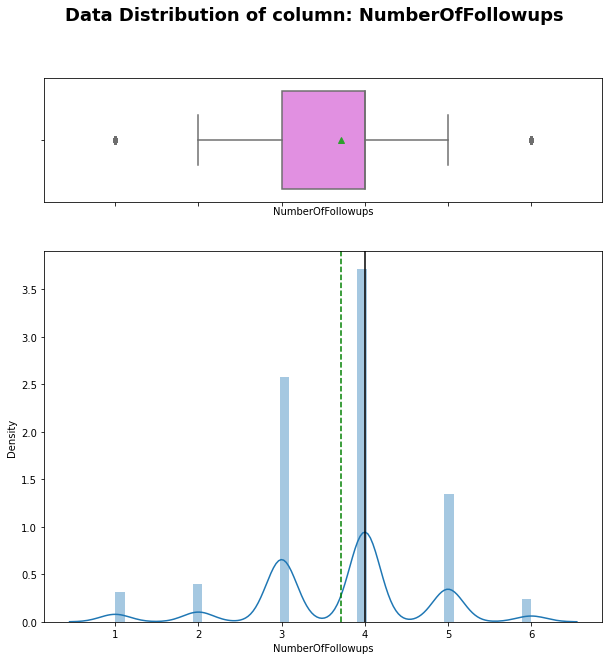

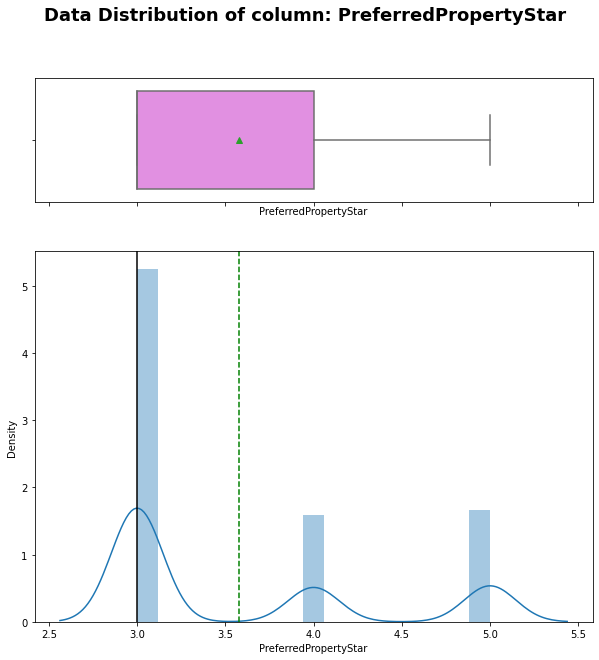

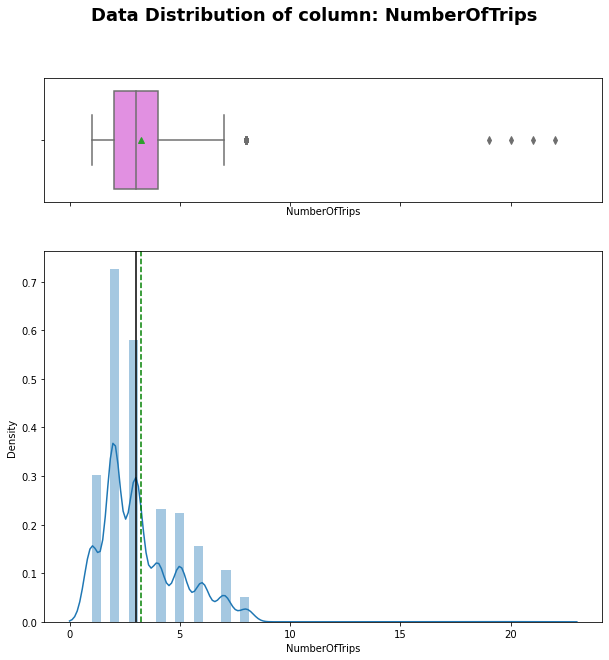

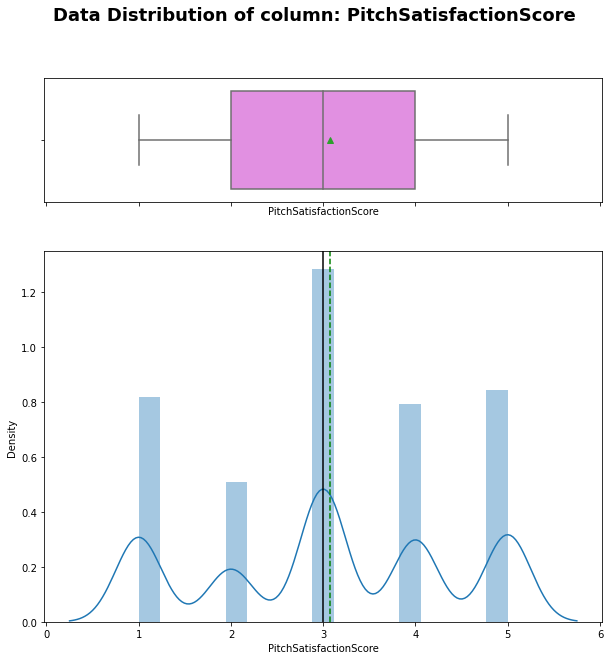

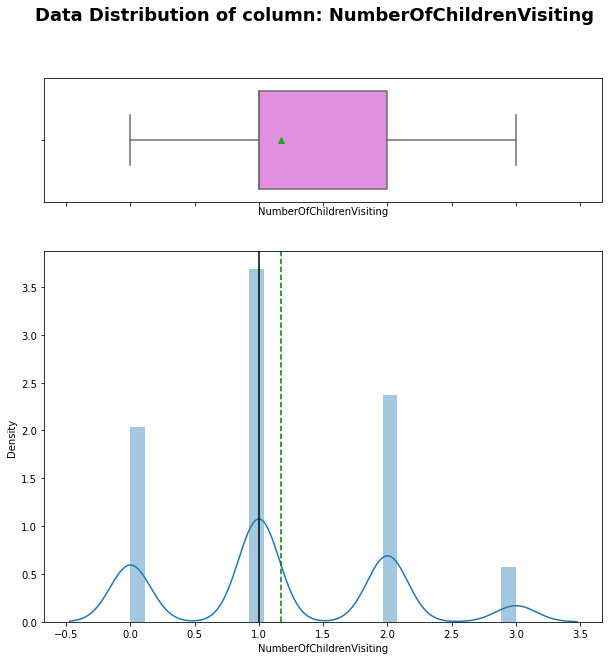

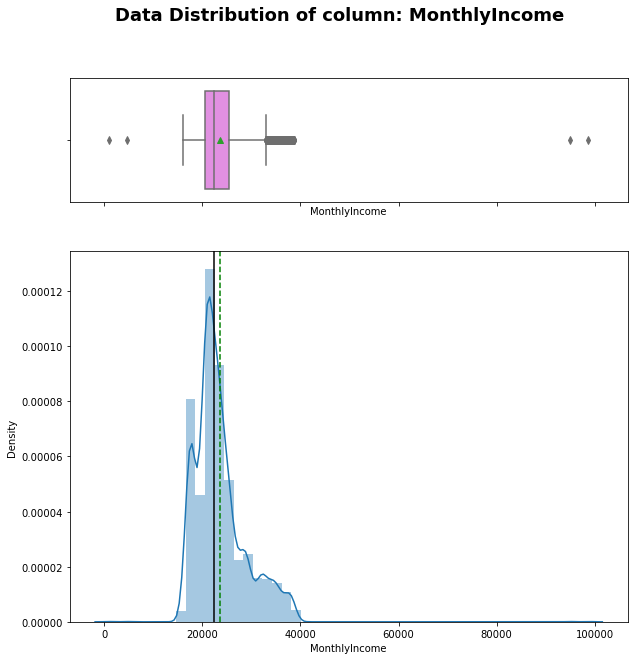

<IPython.core.display.Javascript object>

In [29]:
number_column_list = tourism_data.select_dtypes(include="number").columns.to_list()
number_column_list.remove("ProdTaken")
for i in range(len(number_column_list)):
    histogram_boxplot(tourism_data, number_column_list[i])

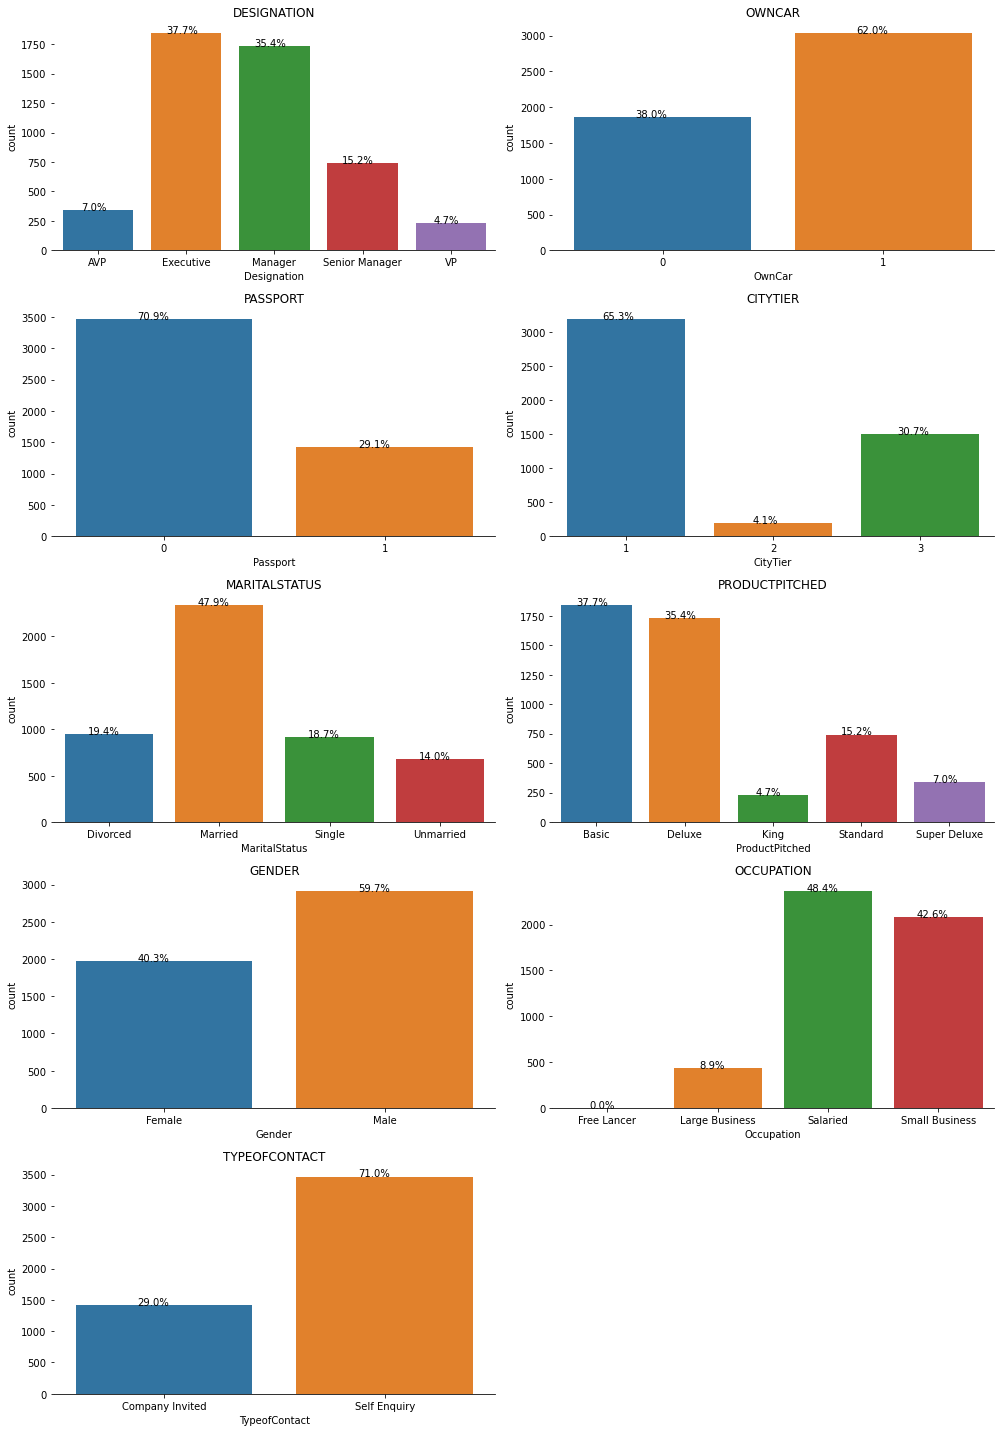

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(14, 20))

for i, column in enumerate(category_cols):
    plt.subplot(5, 2, i + 1)
    order = tourism_data[column].value_counts(ascending=False).index
    # sns.set_palette(list_palette[i]) # to set the palette
    # sns.set_palette("Set2")
    ax = sns.countplot(x=tourism_data[column], data=tourism_data)
    sns.despine(top=True, right=True, left=True)  # to remove side line from graph
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / len(tourism_data[column]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y), ha="center")
    plt.tight_layout()
    plt.title(category_cols[i].upper())

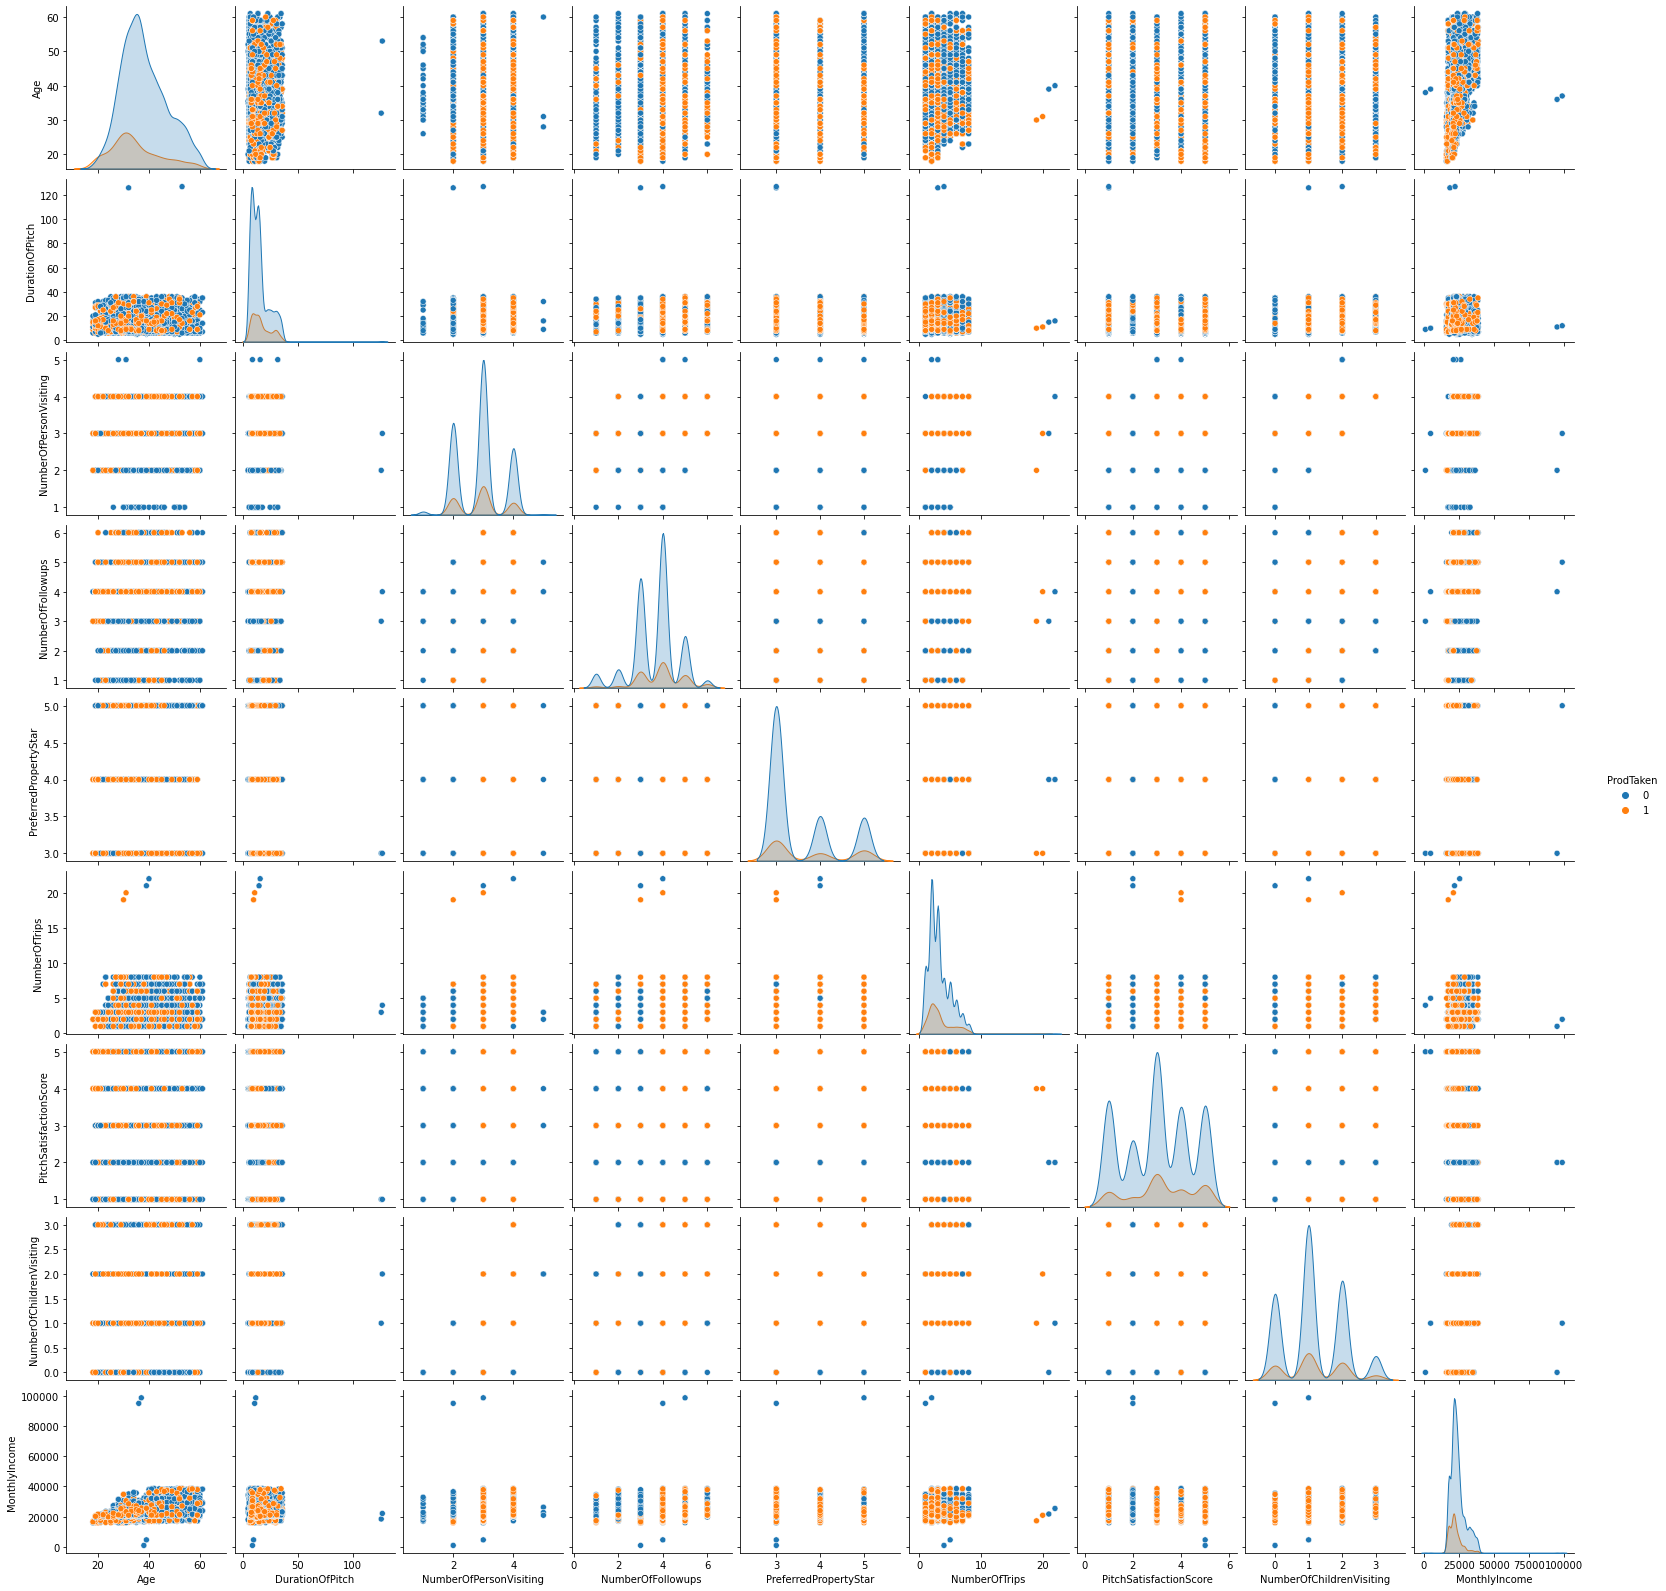

<IPython.core.display.Javascript object>

In [31]:
sns.pairplot(tourism_data, hue="ProdTaken")

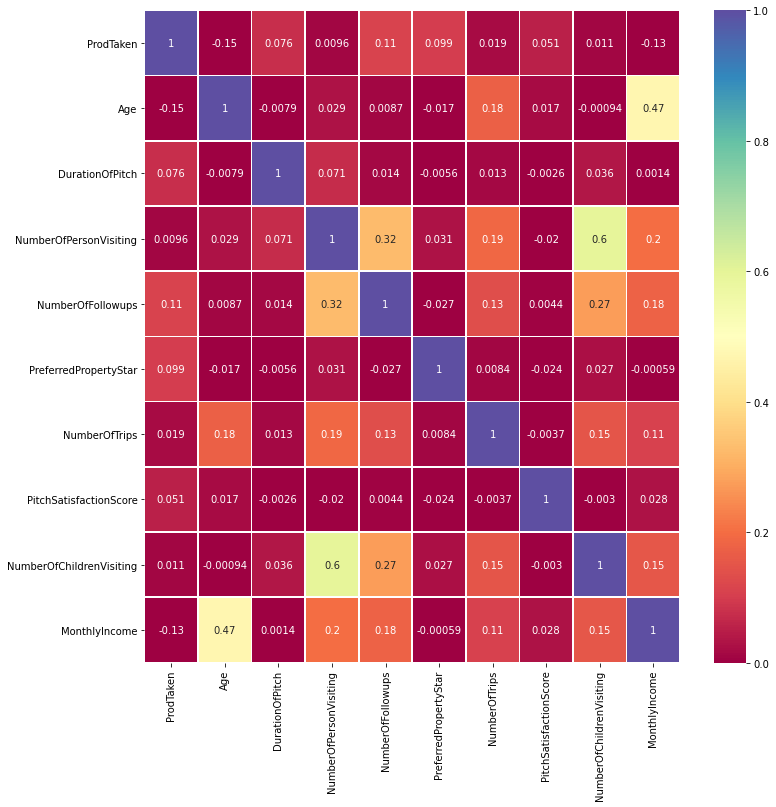

<IPython.core.display.Javascript object>

In [32]:
corr = (
    tourism_data.corr()
)  # coorelation matrix with respect to dependent variable Price
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, linewidths=0.75, cmap="Spectral")
plt.show()

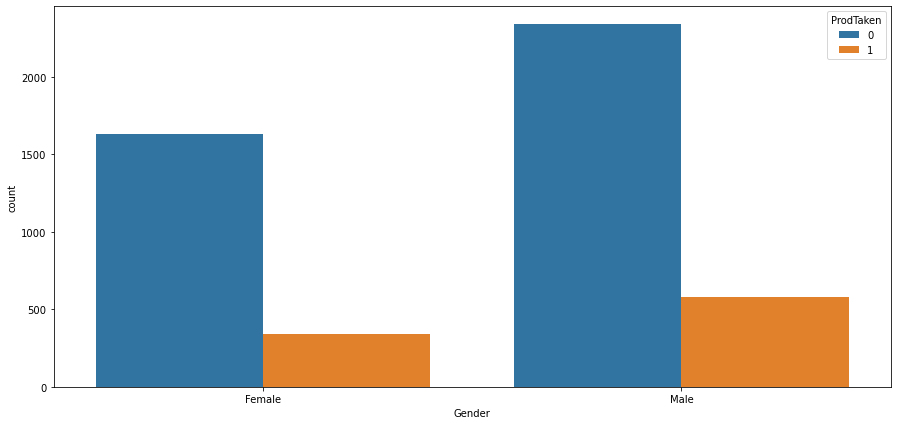

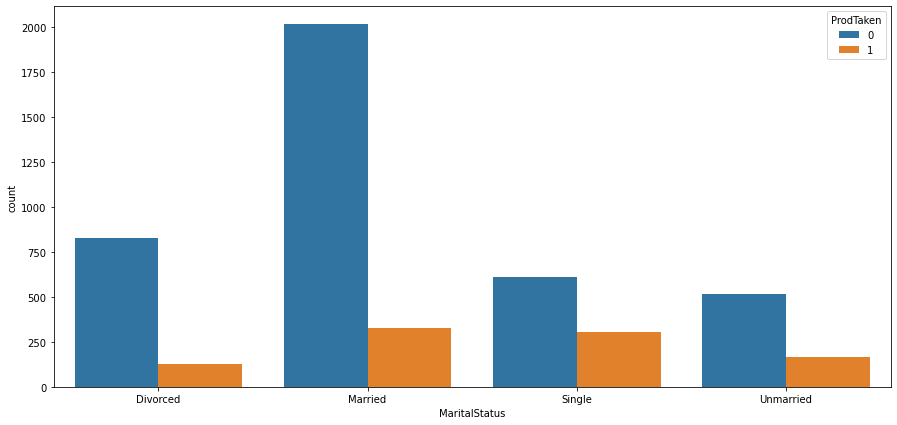

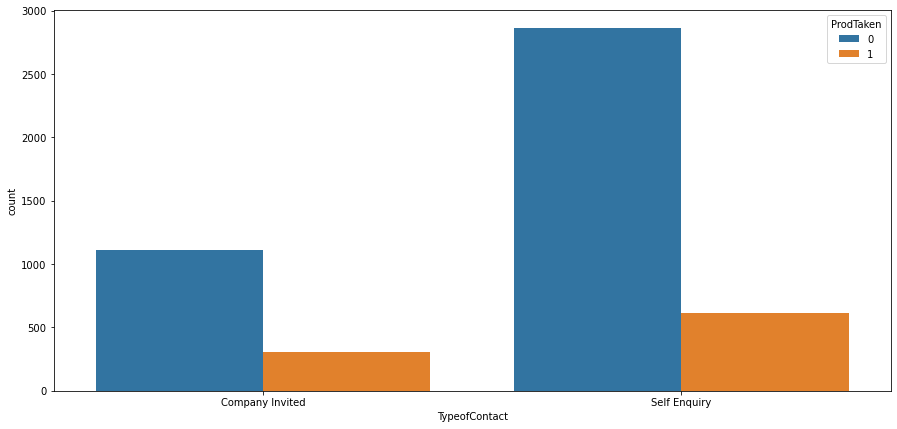

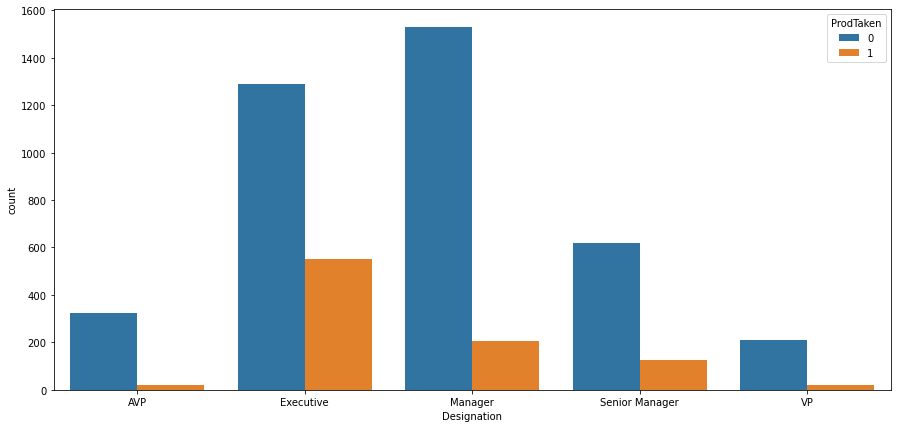

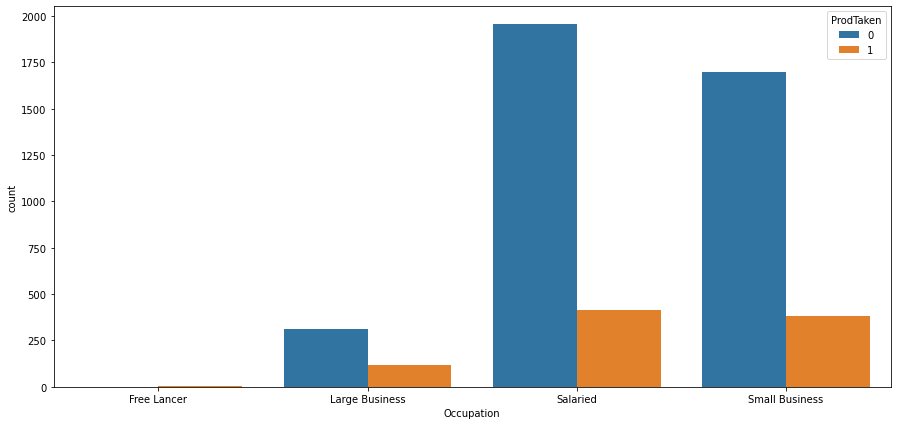

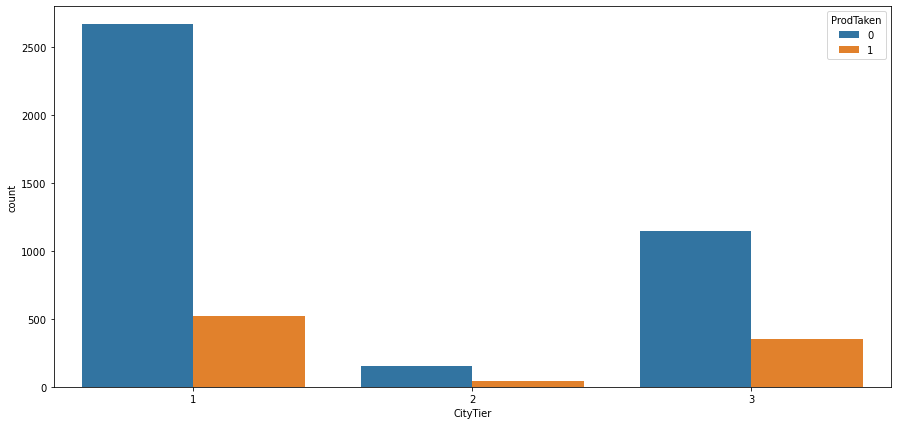

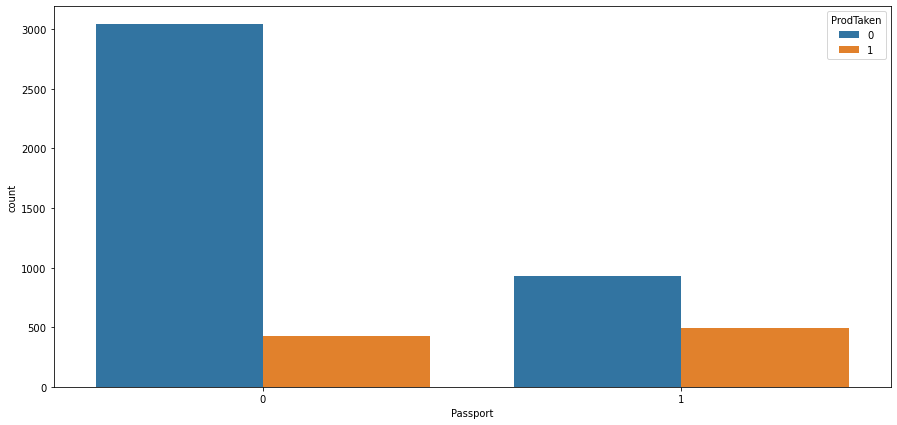

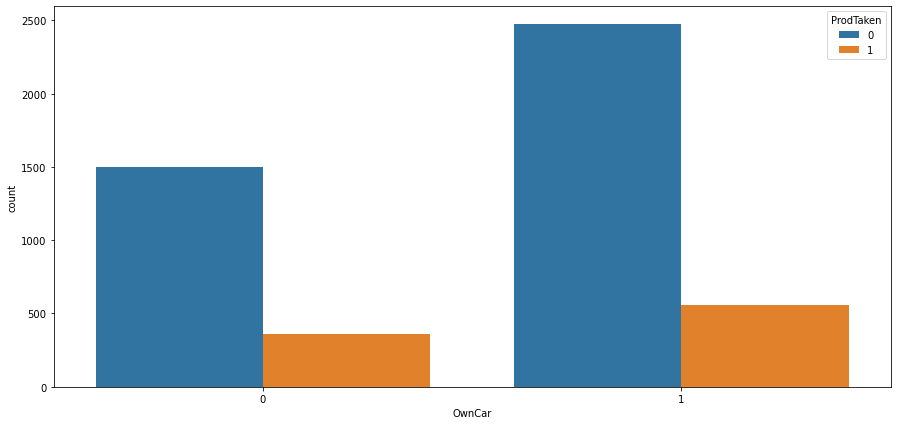

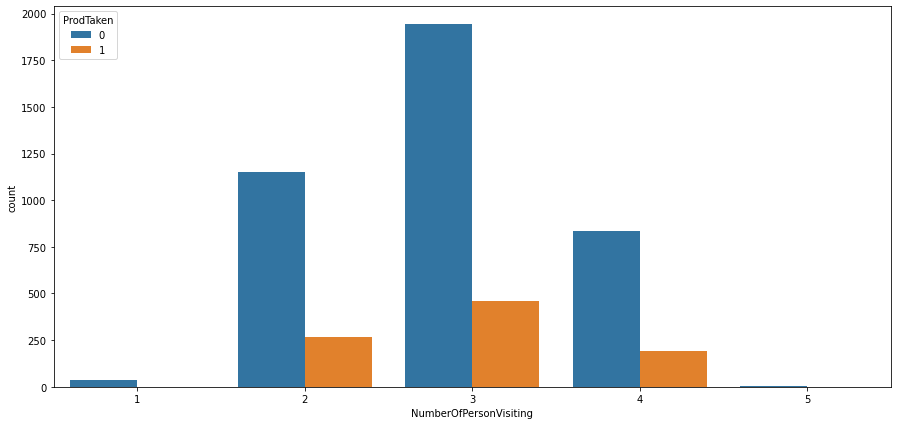

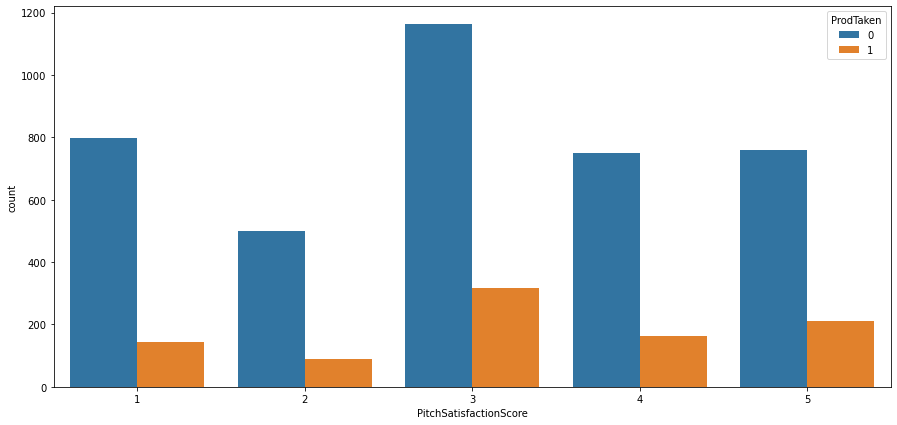

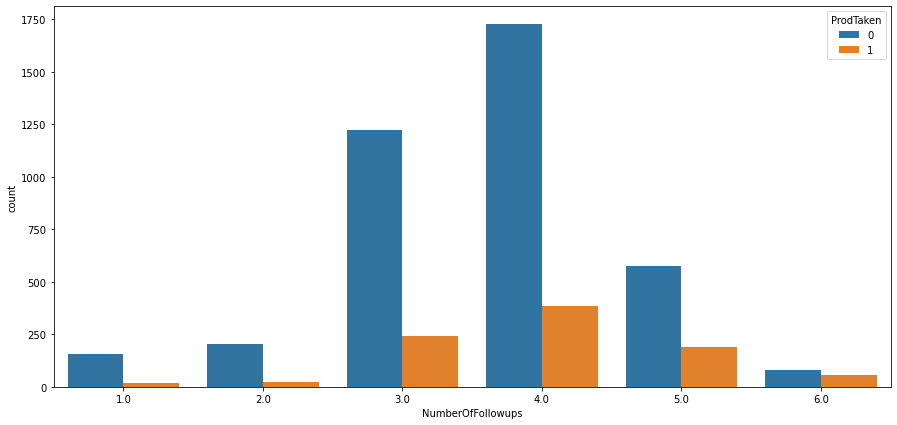

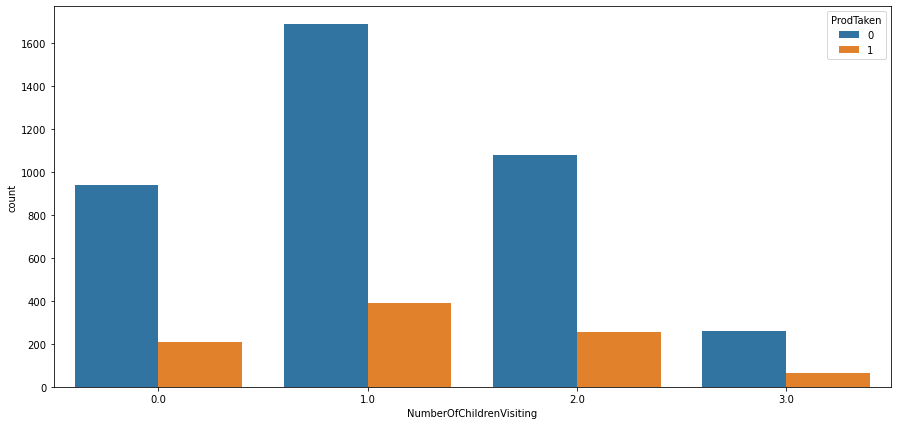

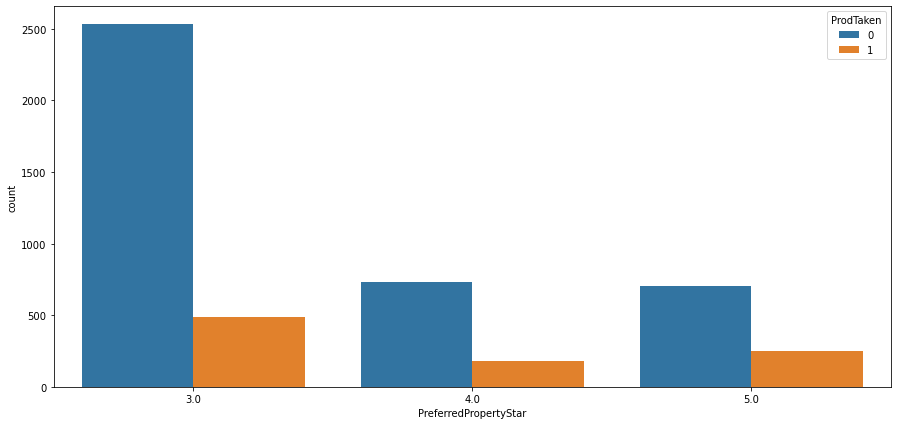

<IPython.core.display.Javascript object>

In [33]:
def countplots(data, cols, figsize=(10, 10), bins=None):
    for i in range(0, len(cols)):
        # plt.subplot(8, 2, i + 1)
        plt.figure(figsize=(15, 7))
        sns.countplot(x=cols[i], hue="ProdTaken", data=data)
        plt.show()


countplots(
    tourism_data,
    [
        "Gender",
        "MaritalStatus",
        "TypeofContact",
        "Designation",
        "Occupation",
        "CityTier",
        "Passport",
        "OwnCar",
        "NumberOfPersonVisiting",
        "PitchSatisfactionScore",
        "NumberOfFollowups",
        "NumberOfChildrenVisiting",
        "PreferredPropertyStar",
    ],
)

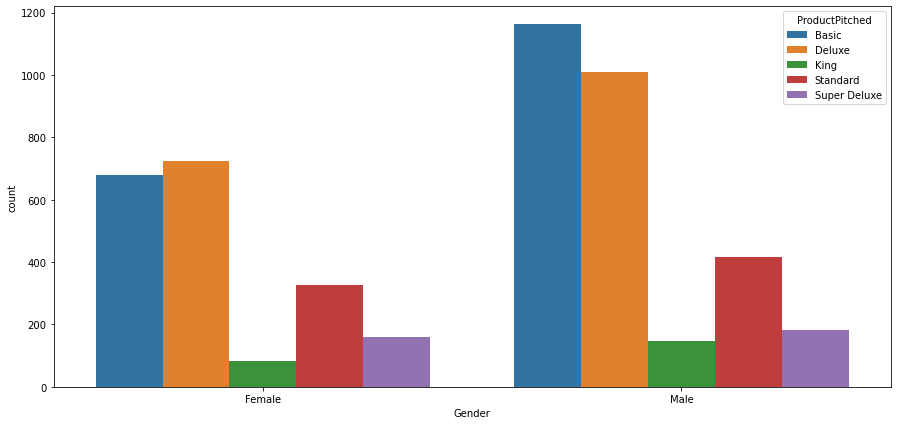

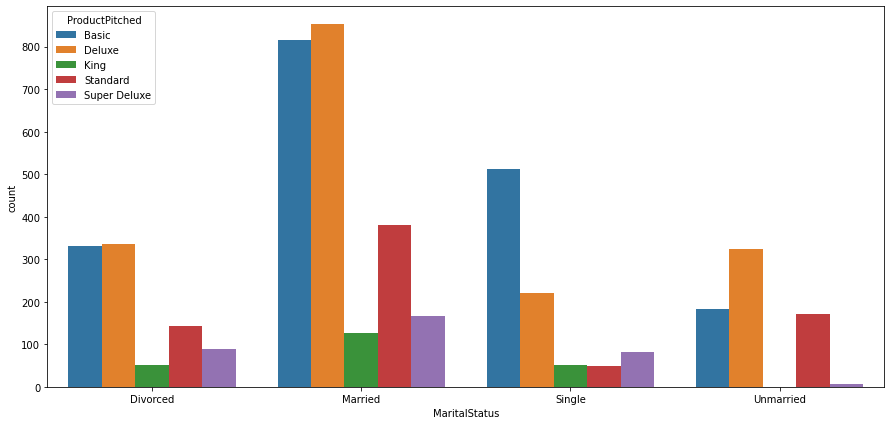

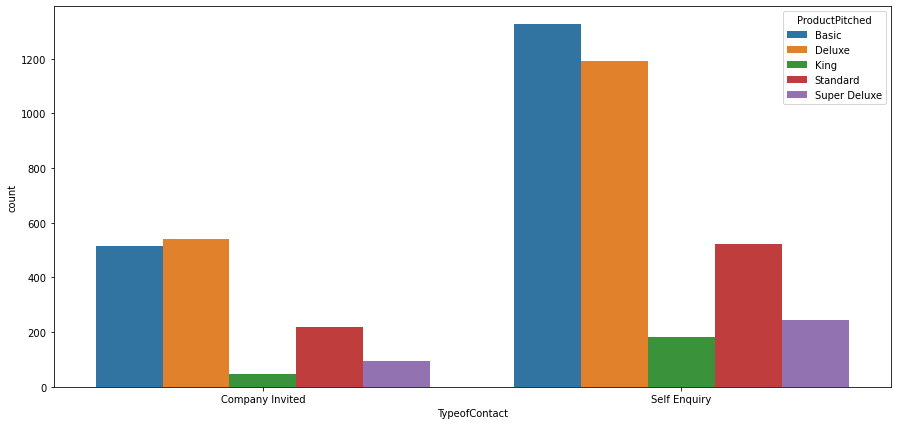

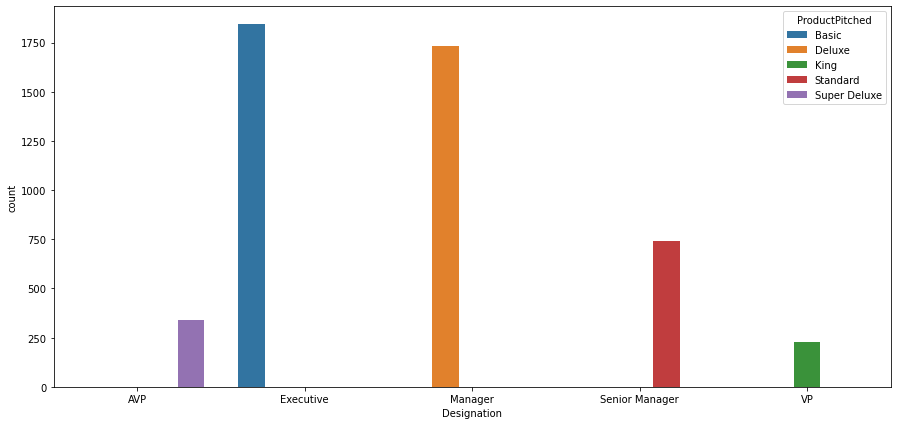

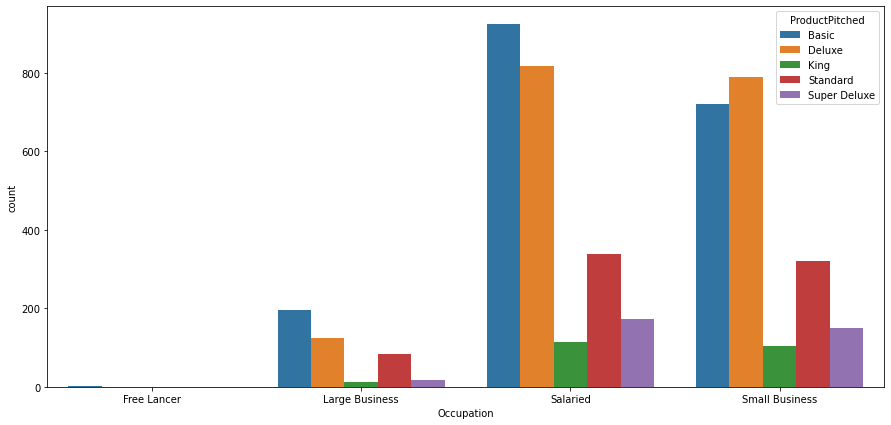

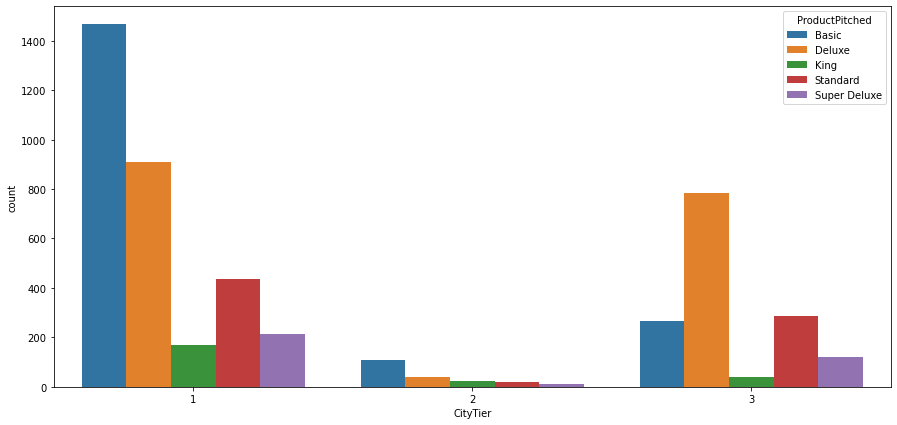

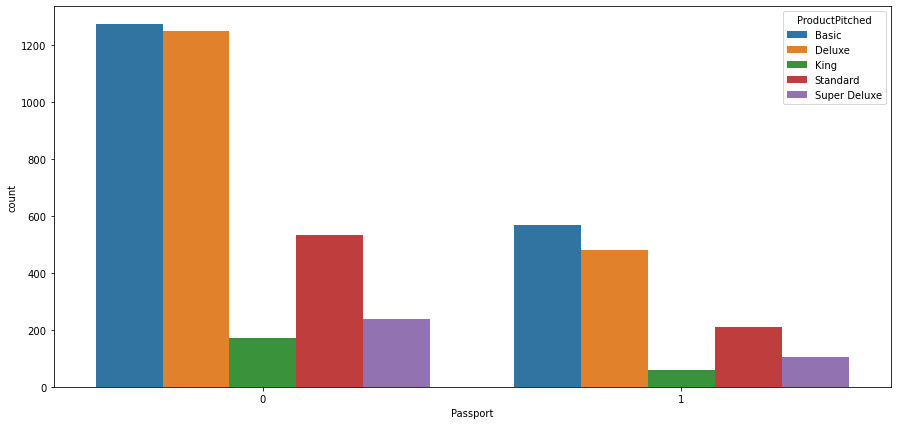

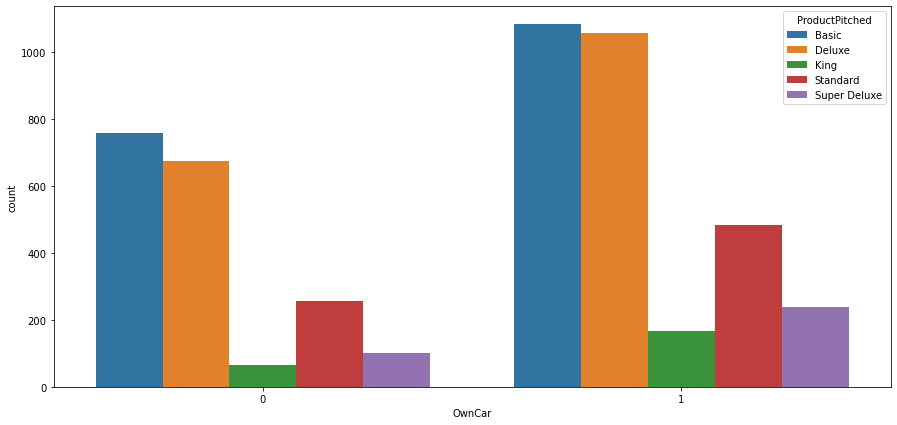

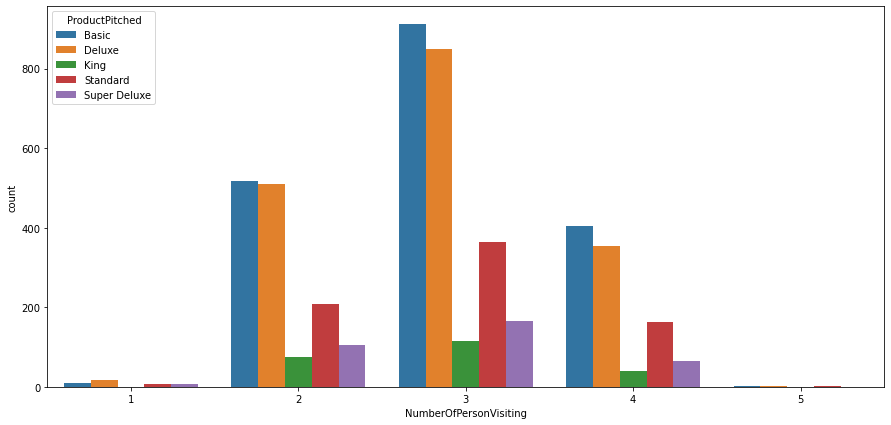

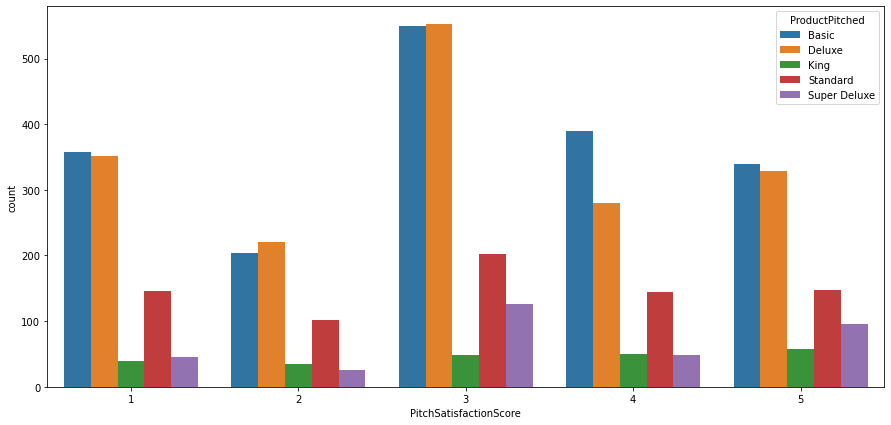

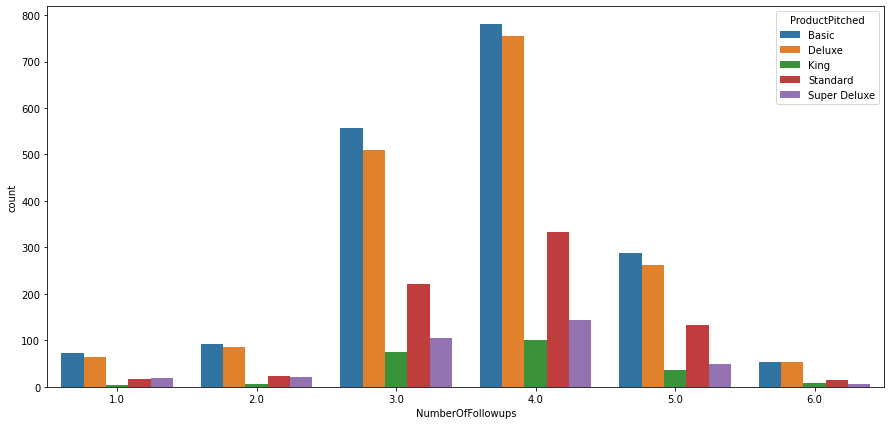

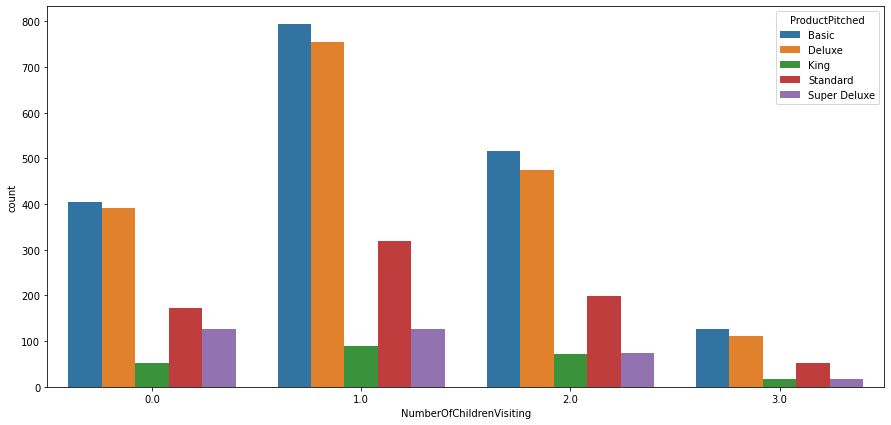

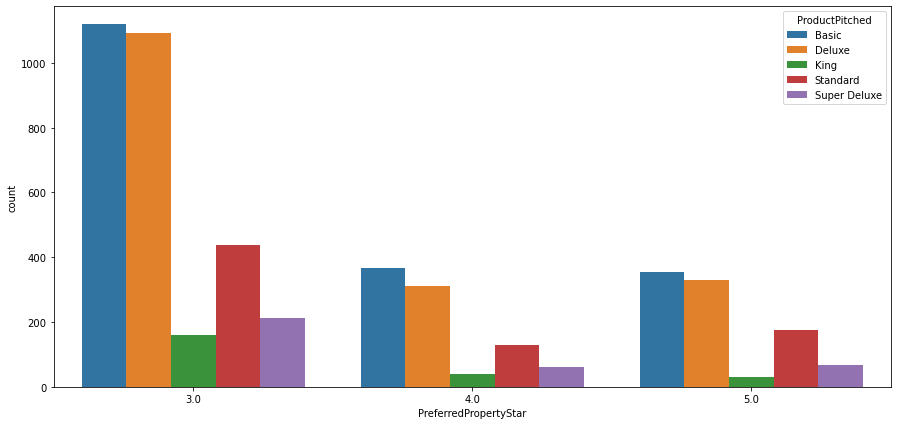

<IPython.core.display.Javascript object>

In [34]:
def countplots(data, cols, figsize=(10, 10), bins=None):
    for i in range(0, len(cols)):
        # plt.subplot(8, 2, i + 1)
        plt.figure(figsize=(15, 7))
        sns.countplot(x=cols[i], hue="ProductPitched", data=data)
        plt.show()


countplots(
    tourism_data,
    [
        "Gender",
        "MaritalStatus",
        "TypeofContact",
        "Designation",
        "Occupation",
        "CityTier",
        "Passport",
        "OwnCar",
        "NumberOfPersonVisiting",
        "PitchSatisfactionScore",
        "NumberOfFollowups",
        "NumberOfChildrenVisiting",
        "PreferredPropertyStar",
    ],
)

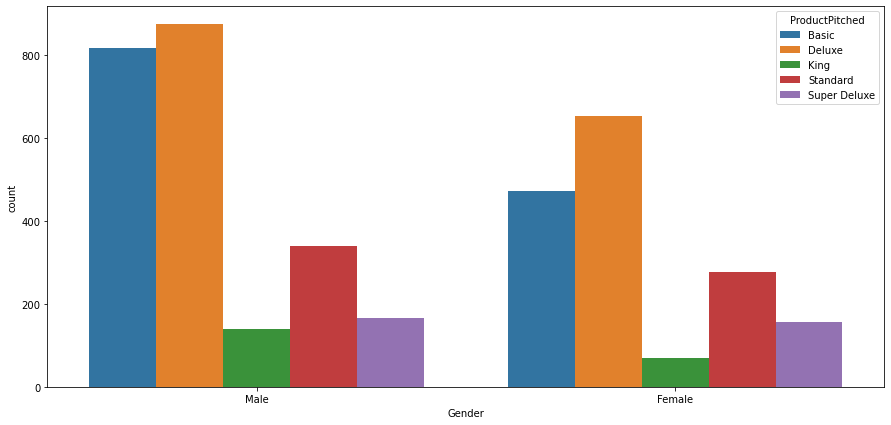

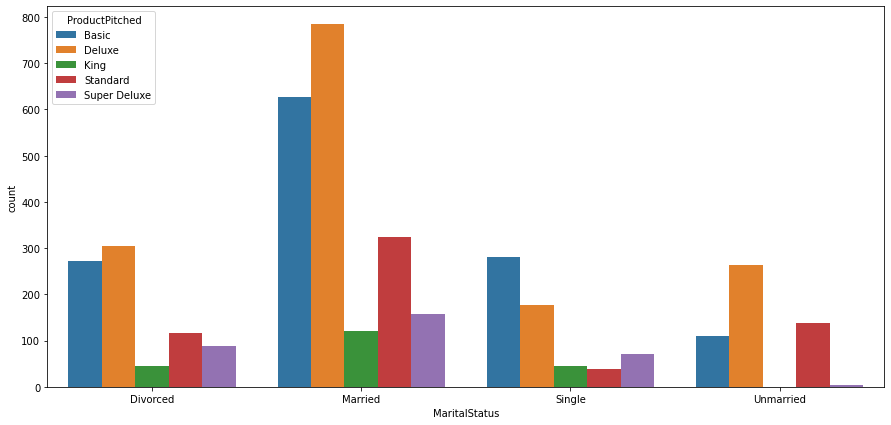

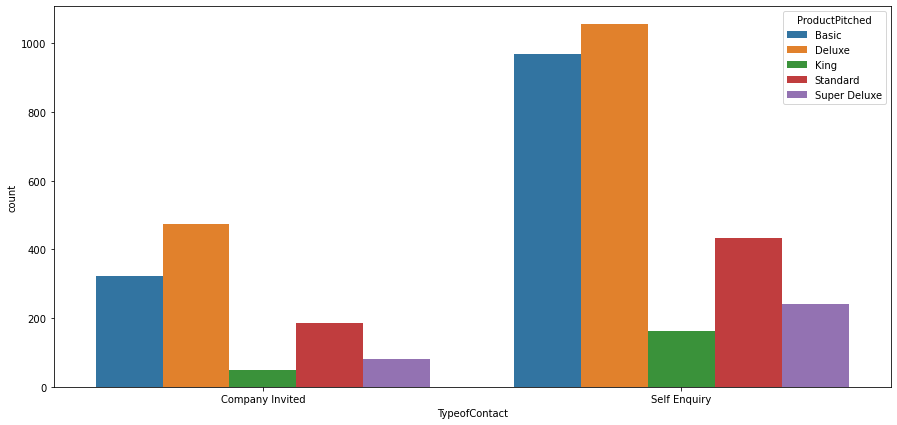

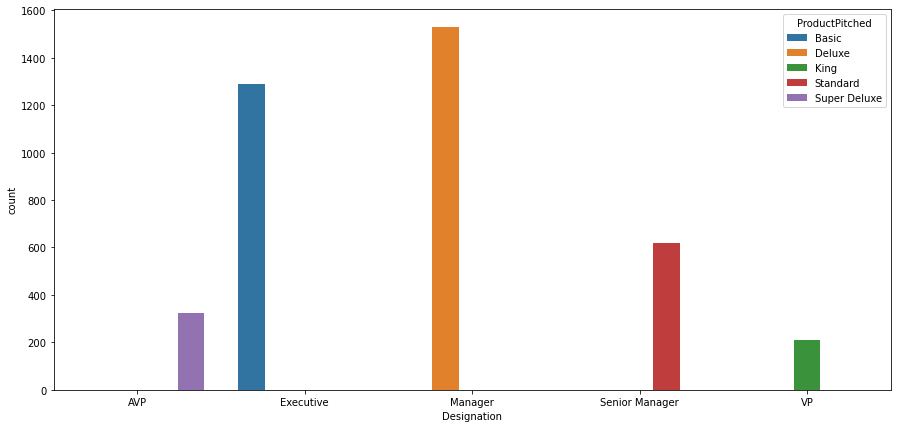

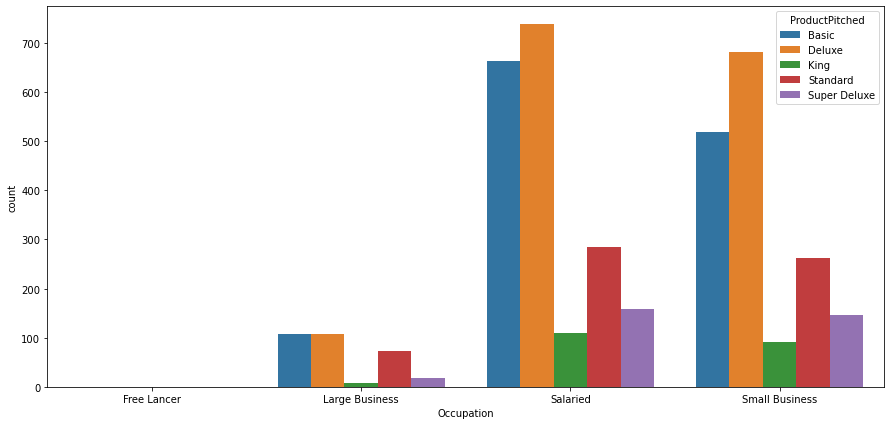

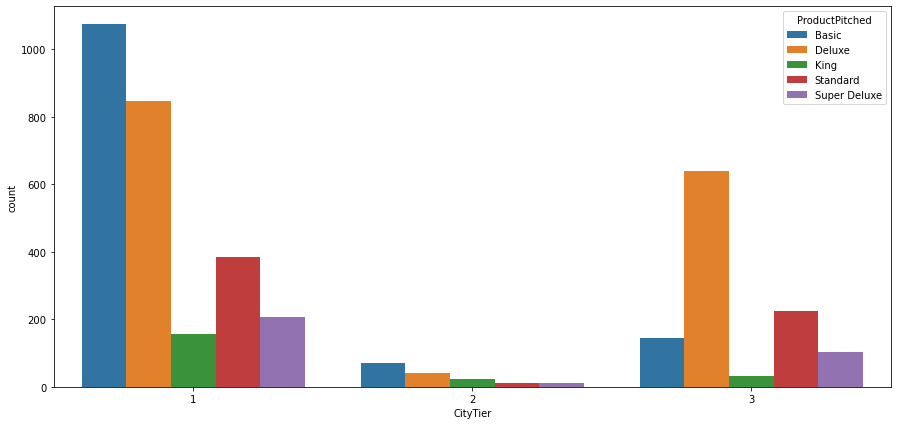

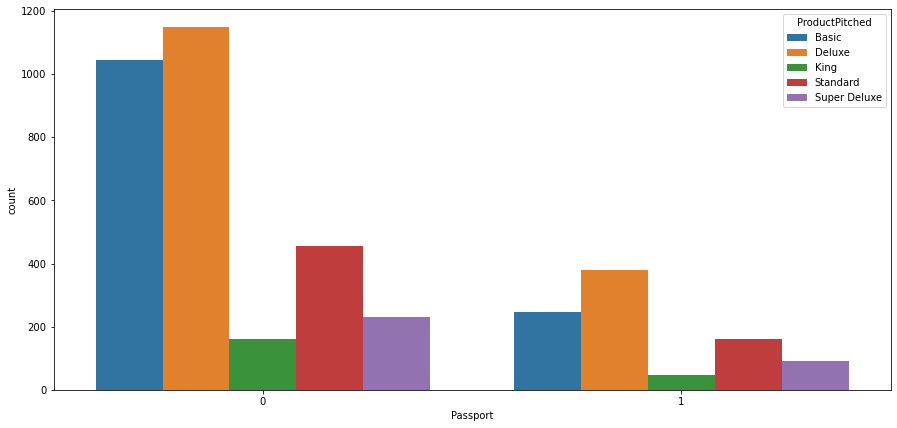

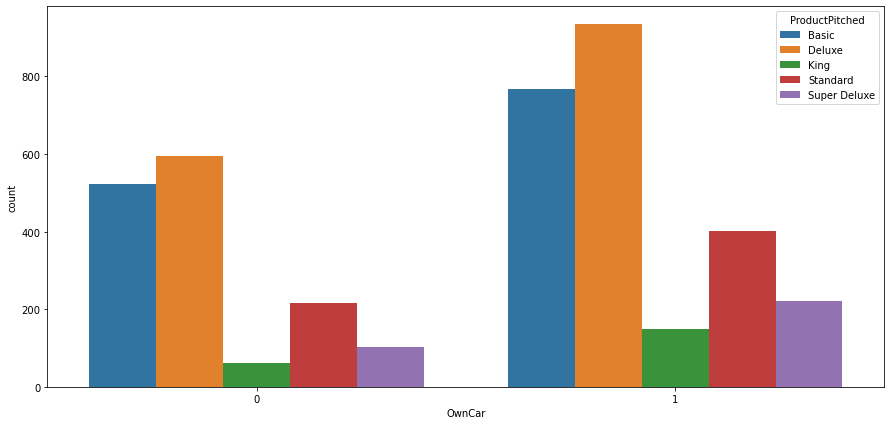

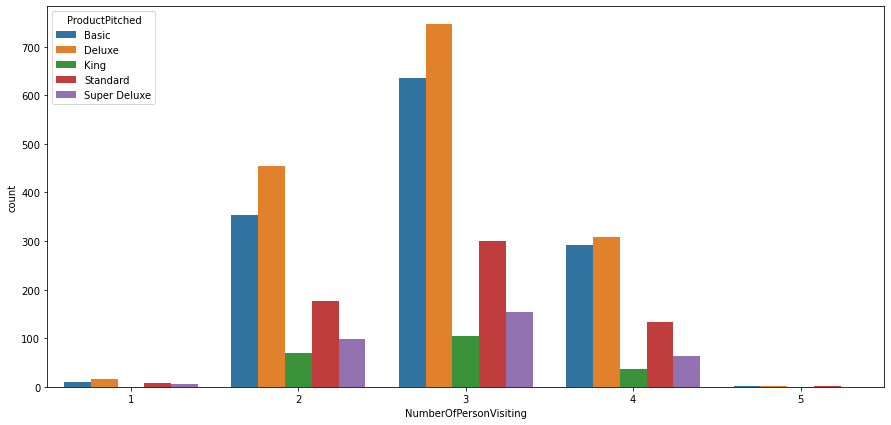

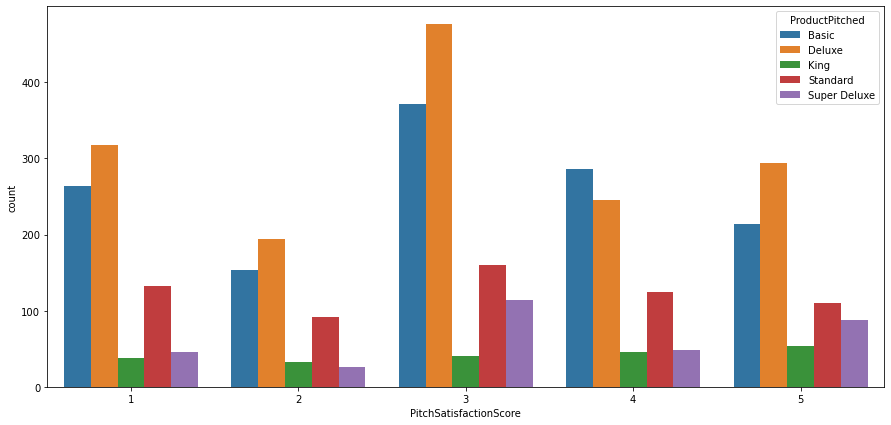

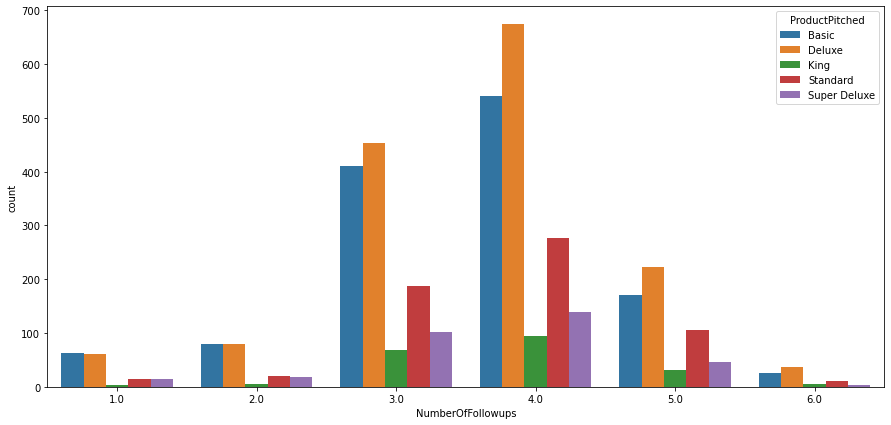

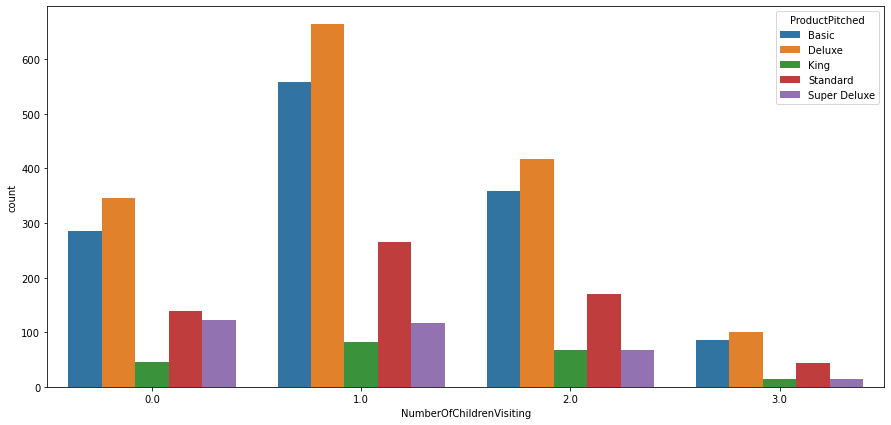

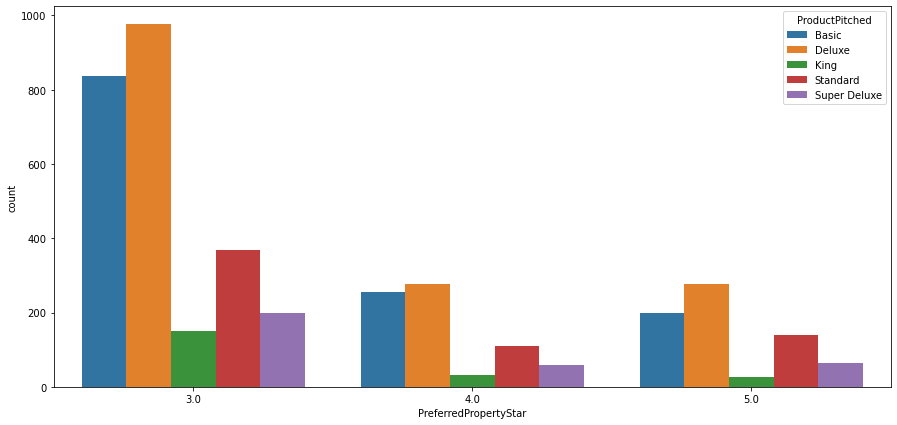

<IPython.core.display.Javascript object>

In [35]:
def countplots(data, cols, figsize=(10, 10), bins=None):
    for i in range(0, len(cols)):
        # plt.subplot(8, 2, i + 1)
        plt.figure(figsize=(15, 7))
        sns.countplot(
            x=cols[i], hue="ProductPitched", data=data[data["ProdTaken"] == 0]
        )
        plt.show()


countplots(
    tourism_data,
    [
        "Gender",
        "MaritalStatus",
        "TypeofContact",
        "Designation",
        "Occupation",
        "CityTier",
        "Passport",
        "OwnCar",
        "NumberOfPersonVisiting",
        "PitchSatisfactionScore",
        "NumberOfFollowups",
        "NumberOfChildrenVisiting",
        "PreferredPropertyStar",
    ],
)

Text(0.5, 1.0, 'Product Distribution based on Income')

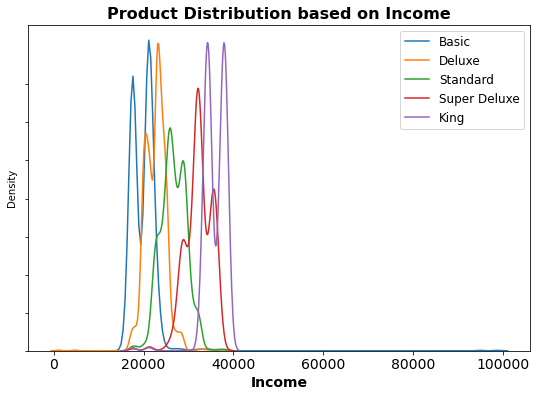

<IPython.core.display.Javascript object>

In [36]:
fig = plt.figure(figsize=[9, 6])
sns.distplot(
    tourism_data.loc[tourism_data["ProductPitched"] == "Basic", "MonthlyIncome"],
    kde=True,
    hist=False,
    label="Basic",
)
sns.distplot(
    tourism_data.loc[tourism_data["ProductPitched"] == "Deluxe", "MonthlyIncome"],
    kde=True,
    hist=False,
    label="Deluxe",
)
sns.distplot(
    tourism_data.loc[tourism_data["ProductPitched"] == "Standard", "MonthlyIncome"],
    kde=True,
    hist=False,
    label="Standard",
)
sns.distplot(
    tourism_data.loc[tourism_data["ProductPitched"] == "Super Deluxe", "MonthlyIncome"],
    kde=True,
    hist=False,
    label="Super Deluxe",
)
sns.distplot(
    tourism_data.loc[tourism_data["ProductPitched"] == "King", "MonthlyIncome"],
    kde=True,
    hist=False,
    label="King",
)
plt.yticks(np.arange(0, 0.0002, 0.000025), labels=["", "", "", "", "", "", "", ""])
plt.xticks(fontsize=14)
plt.xlabel("Income", fontsize=14, fontweight="bold")
plt.legend(fontsize=12)
plt.title("Product Distribution based on Income", fontsize=16, fontweight="bold")

<AxesSubplot:xlabel='ProductPitched', ylabel='DurationOfPitch'>

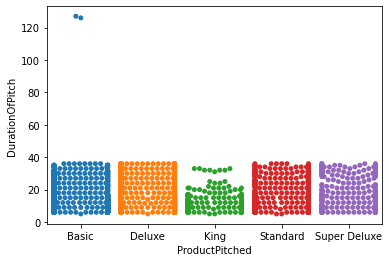

<IPython.core.display.Javascript object>

In [37]:
sns.swarmplot(data=tourism_data, x="ProductPitched", y="DurationOfPitch")

In [38]:
tourism_data.sample(5, random_state=1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,0.0,VP,34833.0
3073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0


<IPython.core.display.Javascript object>

In [39]:
oneHotCols = ['TypeofContact',"Occupation","Gender","ProductPitched","MaritalStatus","Designation"]

tourism_data=pd.get_dummies(tourism_data, columns=oneHotCols)


<IPython.core.display.Javascript object>

In [40]:
tourism_data.sample(5, random_state=1)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
3015,0,27.0,1,7.0,4,6.0,3.0,5.0,0,4,...,0,0,1,0,0,0,1,0,0,0
1242,0,40.0,3,13.0,2,3.0,4.0,2.0,0,4,...,0,0,0,1,0,0,0,0,0,1
3073,0,29.0,2,15.0,4,5.0,3.0,3.0,0,2,...,0,0,1,0,0,0,1,0,0,0
804,0,48.0,1,6.0,2,1.0,3.0,3.0,0,2,...,1,0,0,1,0,1,0,0,0,0
3339,0,32.0,1,18.0,4,4.0,5.0,3.0,1,2,...,0,1,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

**Observations -**
* We have data of women with an average of 4 pregnancies.
* Variables like Glucose, BloodPressure, SkinThickness, and Insulin have minimum values of 0 which might be data input errors and we should explore it further.
* There is a large difference between the 3rd quartile and maximum value for variables like SkinThickness, Insulin, and Age which suggest that there might be outliers present in the data.
* The average age of women in the data is 33 years.

In [41]:
tourism_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,NaN,NaN,NaN,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,NaN,NaN,NaN,37.413564,9.162798,18.0,31.00,36.0,43.00,61.0
CityTier,4888.0,3.0,1.0,3190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,4888.0,NaN,NaN,NaN,15.395765,8.309544,5.0,9.00,14.0,19.00,127.0
NumberOfPersonVisiting,4888.0,NaN,NaN,NaN,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,NaN,NaN,NaN,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,NaN,NaN,NaN,3.577946,0.797005,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,NaN,NaN,NaN,3.224223,1.824971,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,2.0,0.0,3466.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PitchSatisfactionScore,4888.0,NaN,NaN,NaN,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0


<IPython.core.display.Javascript object>

## Split Data

In [42]:
X = tourism_data.drop("ProdTaken", axis=1)
y = tourism_data["ProdTaken"]

<IPython.core.display.Javascript object>

In [43]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(3421, 34) (1467, 34)


<IPython.core.display.Javascript object>

**The Stratify arguments maintain the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [44]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

<IPython.core.display.Javascript object>

In [45]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

<IPython.core.display.Javascript object>

## Model evaluation criterion

### The model can make wrong predictions as:
1. Predicting a person doesn't have diabetes and the person has diabetes.
2. Predicting a person has diabetes, and the person doesn't have diabetes.

### Which case is more important? 
* Predicting a person doesn't have diabetes, and the person has diabetes.

### Which metric to optimize?
* We would want Recall to be maximized, the greater the Recall higher the chances of minimizing false negatives because if a model predicts that a person is at risk of diabetes and in reality, that person doesn't have diabetes then that person can go through further levels of testing to confirm whether the person is actually at risk of diabetes but if we predict that a person is not at risk of diabetes but the person is at risk of diabetes then that person will go undiagnosed and this would lead to further health problems.

**Let's define a function to provide recall scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [47]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.993277  0.967391     0.9968  0.981875
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.91002  0.612319   0.871134  0.719149


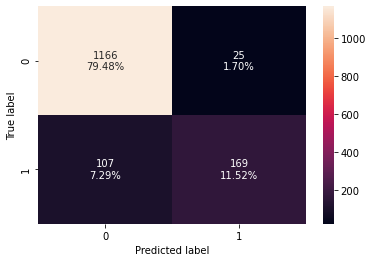

<IPython.core.display.Javascript object>

In [48]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print("Testing performance:\n", bagging_classifier_model_test_perf)
# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* The decision tree is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
* The test recall is very low i.e. only 58%.

### Random Forest

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0    0.9182  0.601449   0.943182  0.734513


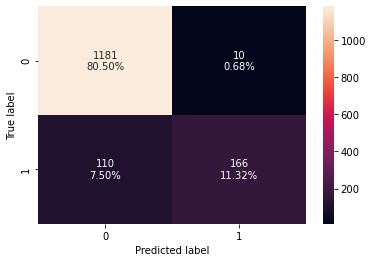

<IPython.core.display.Javascript object>

In [49]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* Random forest is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
* The test recall is even lower than the decision tree but has a higher test precision.

### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.901159  0.764493   0.725086  0.744268


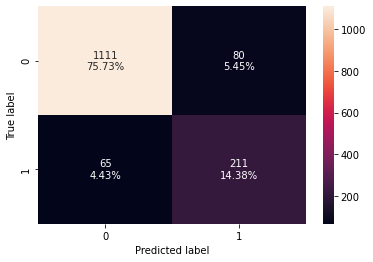

<IPython.core.display.Javascript object>

In [50]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

# Calculating different metrics
dtree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", dtree_model_train_perf)
dtree_model_test_perf = model_performance_classification_sklearn(d_tree, X_test, y_test)
print("Testing performance:\n", dtree_model_test_perf)
# Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

### Tuning Bagging Classifier

In [51]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999708  0.998447        1.0  0.999223
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.918882  0.619565   0.924324  0.741866


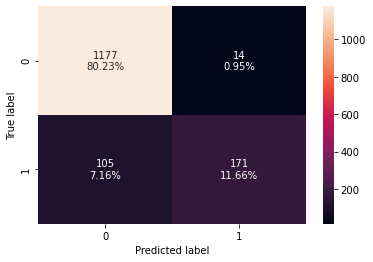

<IPython.core.display.Javascript object>

In [52]:
# Calculating different metrics
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

### Tuning Decision Tree

In [53]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [1, 4, 7, 15],
    "min_samples_leaf": [2, 3, 5, 7],
    "max_leaf_nodes": [5, 7, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=7,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=2, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.776381  0.658385   0.437564  0.525728
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.784594  0.677536   0.451691  0.542029


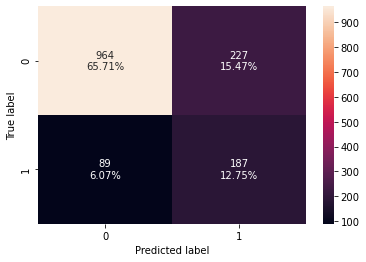

<IPython.core.display.Javascript object>

In [54]:
# Calculating different metrics
dtree_tuned_model_train_perf = model_performance_classification_sklearn(
    dtree_tuned, X_train, y_train
)
print("Training performance:\n", dtree_tuned_model_train_perf)
dtree_tuned_model_test_perf = model_performance_classification_sklearn(
    dtree_tuned, X_test, y_test
)
print("Testing performance:\n", dtree_tuned_model_test_perf)
# Creating confusion matrix
confusion_matrix_sklearn(dtree_tuned, X_test, y_test)

* The test recall has increased significantly after hyperparameter tuning and the decision tree is giving a generalized performance.
* The confusion matrix shows that the model can identify the majority of patients who are at risk of diabetes.

### Tuning Random Forest

In [55]:
# # Choose the type of classifier.
# rf_tuned = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

# parameters = {
#     "max_depth": list(np.arange(3, 10, 1)),
#     "max_features": np.arange(0.6, 1.1, 0.1),
#     "max_samples": np.arange(0.7, 1.1, 0.1),
#     "min_samples_split": np.arange(2, 20, 5),
#     "n_estimators": np.arange(30, 160, 20),
#     "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
# }


# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.f1_score)

# # Run the grid search
# grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# rf_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data.
# rf_tuned.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [56]:
# #Calculating different metrics
# rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
# print("Training performance:\n",rf_tuned_model_train_perf)
# rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
# print("Testing performance:\n",rf_tuned_model_test_perf)

# #Creating confusion matrix
# confusion_matrix_sklearn(rf_tuned, X_test, y_test)

<IPython.core.display.Javascript object>

* The test recall has increased significantly after hyperparameter tuning but the  model is still overfitting the training data.
* The confusion matrix shows that the model can identify the majority of patients who are at risk of diabetes.

* Surprisingly, the test recall has decreased after hyperparameter tuning and the  model is still overfitting the training data.
* The confusion matrix shows that the model is not good at identifying patients who are at risk of diabetes.

## Comparing all the models

In [57]:
# # training performance comparison

# models_train_comp_df = pd.concat(
#     [dtree_model_train_perf.T,dtree_tuned_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
#      bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T],
#     axis=1,
# )
# models_train_comp_df.columns = [
#     "Decision Tree",
#     "Decision Tree Estimator",
#     "Random Forest Estimator",
#     "Random Forest Tuned",
#     "Bagging Classifier",
#     "Bagging Estimator Tuned"]
# print("Training performance comparison:")
# models_train_comp_df

<IPython.core.display.Javascript object>

In [58]:
# testing performance comparison

# models_test_comp_df = pd.concat(
#     [dtree_model_test_perf.T,dtree_tuned_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
#      bagging_classifier_model_test_perf.T, bagging_estimator_tuned_model_test_perf.T],
#     axis=1,
# )
# models_test_comp_df.columns = [
#     "Decision Tree",
#     "Decision Tree Estimator",
#     "Random Forest Estimator",
#     "Random Forest Tuned",
#     "Bagging Classifier",
#     "Bagging Estimator Tuned"]
# print("Testing performance comparison:")
# models_test_comp_df

<IPython.core.display.Javascript object>

* A tuned decision tree is the best model for our data as it has the highest test recall and giving a generalized performance as compared to other models.

### Feature importance of tuned decision tree

In [59]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(dtree_tuned, feature_names=feature_names, show_weights=True))

|--- Passport <= 0.50
|   |--- MaritalStatus_Single <= 0.50
|   |   |--- CityTier <= 1.50
|   |   |   |--- PitchSatisfactionScore <= 2.50
|   |   |   |   |--- weights: [70.80, 10.40] class: 0
|   |   |   |--- PitchSatisfactionScore >  2.50
|   |   |   |   |--- NumberOfTrips <= 5.50
|   |   |   |   |   |--- MaritalStatus_Unmarried <= 0.50
|   |   |   |   |   |   |--- weights: [123.20, 35.20] class: 0
|   |   |   |   |   |--- MaritalStatus_Unmarried >  0.50
|   |   |   |   |   |   |--- weights: [17.20, 16.00] class: 0
|   |   |   |   |--- NumberOfTrips >  5.50
|   |   |   |   |   |--- weights: [22.80, 21.60] class: 0
|   |   |--- CityTier >  1.50
|   |   |   |--- NumberOfFollowups <= 4.50
|   |   |   |   |--- weights: [101.20, 54.40] class: 0
|   |   |   |--- NumberOfFollowups >  4.50
|   |   |   |   |--- weights: [20.00, 29.60] class: 1
|   |--- MaritalStatus_Single >  0.50
|   |   |--- Age <= 31.50
|   |   |   |--- weights: [20.80, 50.40] class: 1
|   |   |--- Age >  31.50
|   |   |   

<IPython.core.display.Javascript object>

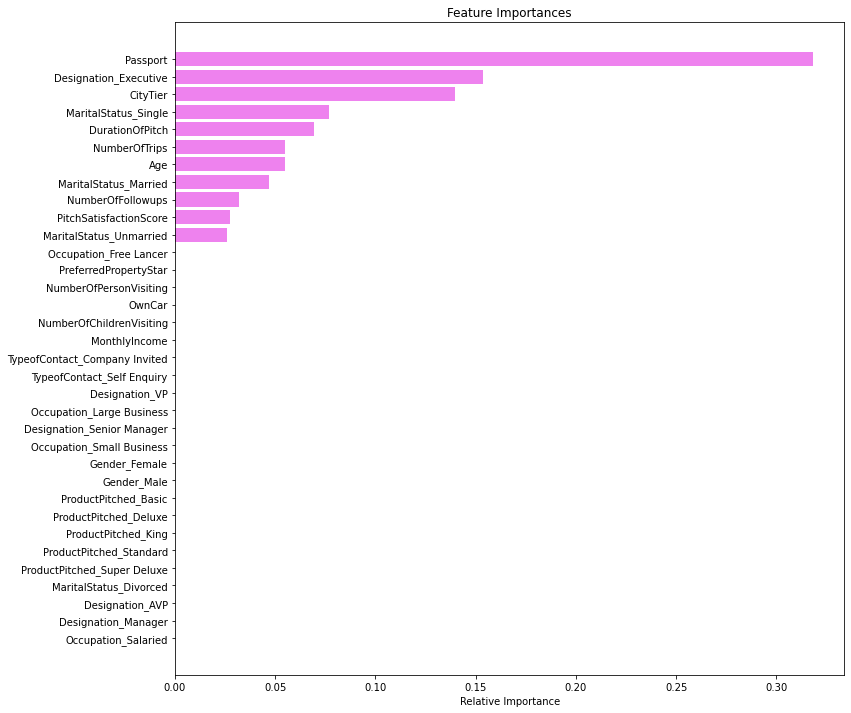

<IPython.core.display.Javascript object>

In [60]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* We can see that Glucose concentration is the most important feature followed by Age and BMI.
* The tuned decision tree is using only three variables to separate the two classes. 

## Conclusion
* We can see that three variables - Glucose, Age, and BMI are the most important factors in identifying persons who are at risk of diabetes. Other variables' importance is not significant. 
* Once the desired performance is achieved from the model, the company can use it to predict the risk factor of diabetes in new patients. This would help to reduce the cost and increase the efficiency of the process.
* Identifying the risk of diabetes at early stages, especially among pregnant women, can help to control the disease and prevent the second health problem.
* As per the decision tree business rules:
    - Women's glucose level <=127 and age <=28 have a lower risk of diabetes.
    - Women's glucose level >100 and age >28 have a higher risk of diabetes.
    - Women's glucose level >127 and BMI <=28 have a lower risk of diabetes.
* Based on the above analysis, we can say that:
    - Middle-aged to older women has a higher risk of diabetes. They should keep the glucose level in check and take proper precautions.
    - Overweight women have a higher risk of diabetes. They should keep the glucose level in check and exercise regularly. 

### Adabooster classifier

   Accuracy    Recall  Precision        F1
0  0.845367  0.312112   0.700348  0.431794
   Accuracy    Recall  Precision        F1
0  0.847989  0.315217   0.719008  0.438287


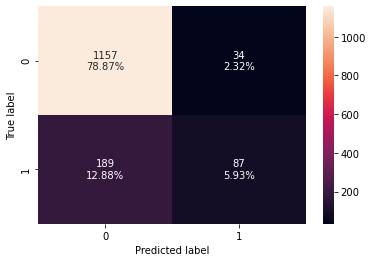

<IPython.core.display.Javascript object>

In [61]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print(ab_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [62]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.9, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

   Accuracy    Recall  Precision        F1
0  0.987138  0.944099   0.987013  0.965079
   Accuracy    Recall  Precision        F1
0  0.887526  0.615942   0.742358  0.673267


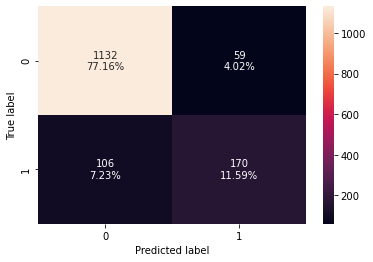

<IPython.core.display.Javascript object>

In [63]:
# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print(abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.88366  0.444099   0.877301  0.589691
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.867076  0.394928    0.79562  0.527845


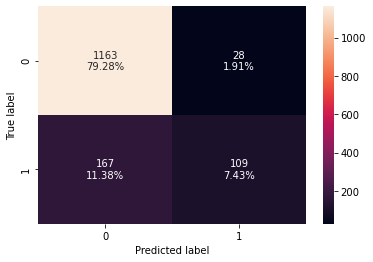

<IPython.core.display.Javascript object>

In [64]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# Calculating different metrics
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [65]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.921368  0.614907    0.94964  0.746466
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.876619  0.467391   0.791411  0.587699


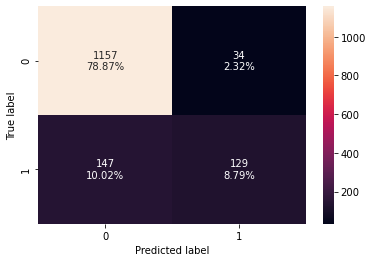

<IPython.core.display.Javascript object>

In [66]:
# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [67]:
estimators = [
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

NameError: name 'rf_tuned' is not defined

<IPython.core.display.Javascript object>